# Projekt

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('new_train.csv')

Ein zentraler Schritt zu Beginn meiner Arbeit besteht darin, nach Duplikaten und fehlenden Daten Ausschau zu halten. 
Zunächst entferne ich Duplikate und überprüfe anschließend den Datensatz auf das Vorhandensein von fehlenden Werten. 

In [3]:
df = df.drop_duplicates()

def missing_data(x):
    """get and show rows with missing data values
       x = datframe"""
    missing_data = x[x.isna().any(axis=1)]
    missing_percentage = (len(missing_data) / len(x)) * 100
    print("Der Trainingsdatensatz enthält %s Zeilen mit fehlenden Werten." % len(missing_data), "Das sind", round(missing_percentage, 2), "% vom Datensatz")

missing_data(df)

Der Trainingsdatensatz enthält 0 Zeilen mit fehlenden Werten. Das sind 0.0 % vom Datensatz


- Keine fehlenden Daten

Datensatz in kategorische und numerische Merkmale unterteilen

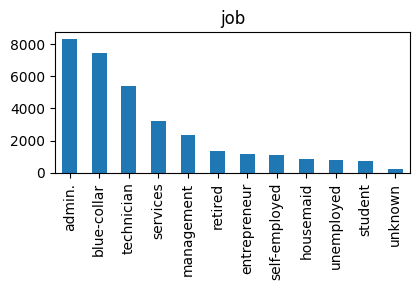

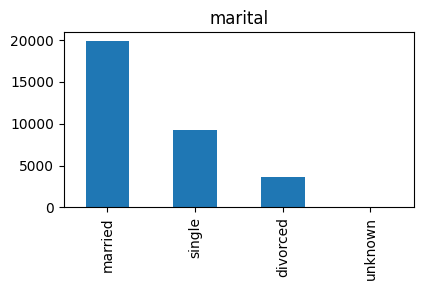

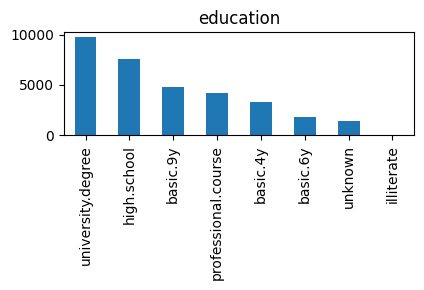

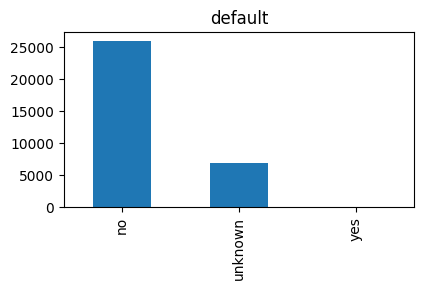

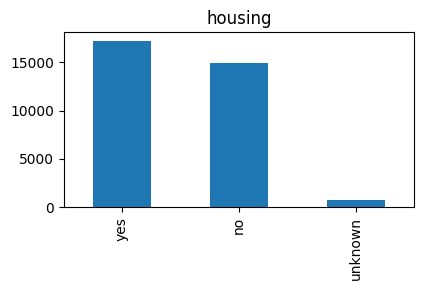

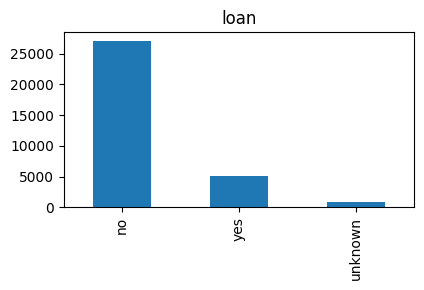

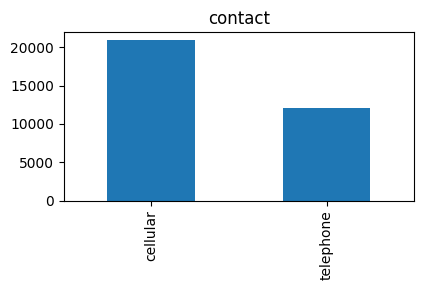

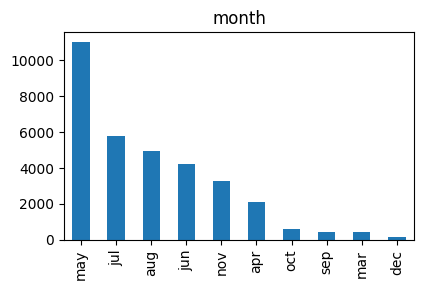

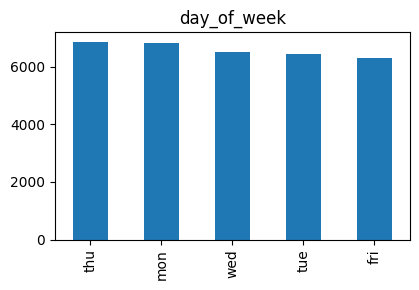

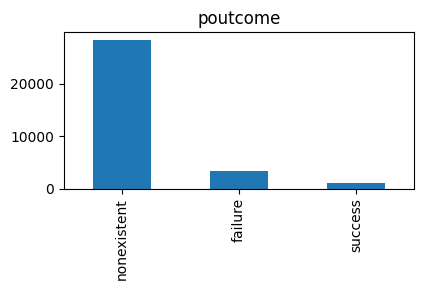

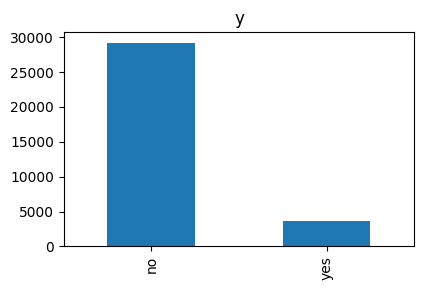

In [4]:
cat_obj = df.select_dtypes(include = ["object"]).columns

for column in cat_obj:
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel("")
    plt.title(column)
    plt.tight_layout()


-Es gibte fehlenden Wert und siee wurden mit unknown gekennzeichnet.
- Die Ausgangsvariable "y" ist nicht ausbalanciert


In [5]:
df = df.replace('unknown', np.nan)

In [6]:
missing_data(df)

Der Trainingsdatensatz enthält 8643 Zeilen mit fehlenden Werten. Das sind 26.24 % vom Datensatz


In [7]:
for column in cat_obj:
    mode = df[column].mode()[0]
    df[column]= df[column].replace(np.nan, mode)

In [8]:
df.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
25969,39,technician,married,high.school,no,no,no,cellular,nov,fri,749,2,999,0,nonexistent,yes
18736,26,blue-collar,married,basic.9y,no,no,no,telephone,jul,tue,77,2,999,0,nonexistent,no
21664,52,technician,married,high.school,no,no,yes,cellular,aug,wed,109,3,999,0,nonexistent,no
30239,36,blue-collar,single,basic.9y,no,yes,yes,cellular,nov,fri,70,1,999,0,nonexistent,no
20044,36,services,single,high.school,no,no,no,cellular,jul,mon,719,2,999,0,nonexistent,no
13948,60,admin.,married,high.school,no,no,no,telephone,may,mon,253,1,999,0,nonexistent,no
31090,32,unemployed,single,high.school,no,yes,no,telephone,jun,fri,219,1,999,0,nonexistent,no
1428,32,services,married,high.school,no,no,no,cellular,may,mon,642,3,10,1,success,yes
14542,48,management,married,university.degree,no,yes,no,cellular,jul,mon,768,2,999,0,nonexistent,no
32762,37,management,married,university.degree,no,no,no,cellular,aug,tue,208,1,999,0,nonexistent,no


Nachdem nun sichergestellt ist, dass keine Duplikate oder Datenfehler mehr vorliegen, kann ich mit dem nächsten Schritt unserer Analyse fortfahren.

<Axes: >

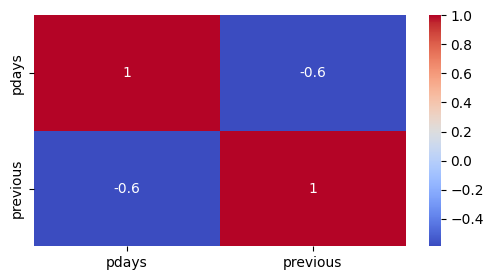

In [9]:
predays = df[['pdays', 'previous']]
fig, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(predays.corr().round(3), annot=True, fmt=".1g", cmap="coolwarm")

Beim genauen Betrachten der Kategorien "pdays" und "previous" ist mir aufgefallen, dass sie möglicherweise ähnliche Informationen vermitteln. Eine Korrelationsanalyse ergab einen Wert von "-0,6". Was darauf hindeutet, dass die Daten in diesen Kategorien stark miteinander korrelieren. Das ergibt auch Sinn, da die Werte „0“ bei „previous“ und „999“ bei „pdays“ praktisch auf das Gleiche hinauslaufen. Die beide wollen aussagen, dass Kunden vor dieser Kampagne der Bank, nicht kontaktiert wurden.

<Axes: xlabel='previous', ylabel='Count'>

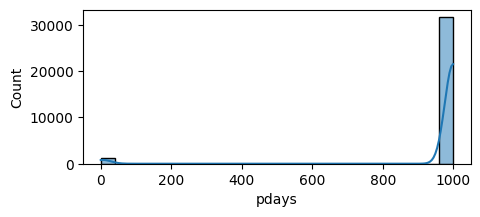

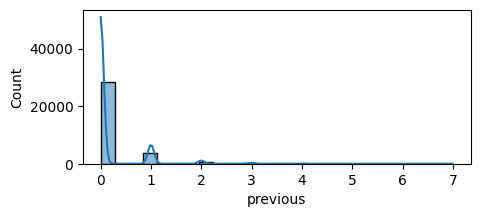

In [10]:
plt.figure(figsize=(5, 2))
sns.histplot(df['pdays'], kde=True, bins=25)
plt.figure(figsize=(5, 2))
sns.histplot(df['previous'], kde=True, bins=25)

Eine geringe Varianz bedeutet, dass die Datenpunkte in diesen Kategorien nur begrenzte Unterschiede aufweisen. Dieser Umstand kann die Analyse und Interpretation der Daten erschweren, da es an deutlichen Unterschieden oder erkennbaren Mustern mangelt. 

In [11]:
df = df.drop(['pdays', 'previous'], axis=1)

### Analyse der Ausreißer

In [12]:
df.describe()

,age,duration,campaign
count,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804
std,10.403035,258.995259,2.752579
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


<Axes: >

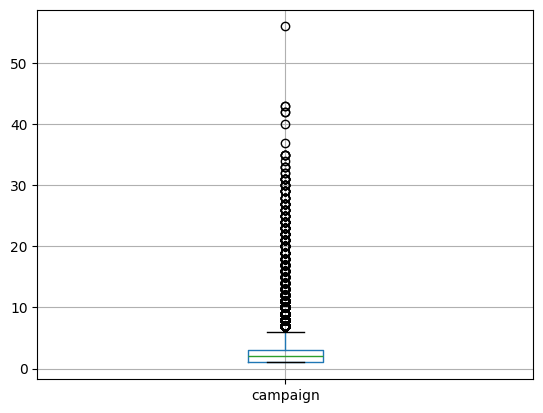

In [13]:
df.boxplot('campaign')

Histogramm zeigt, dass alle numerischen Kategorien rechtsschief sind. Einheitliche Bereinigung der Ausreißer durch die IQR Methode


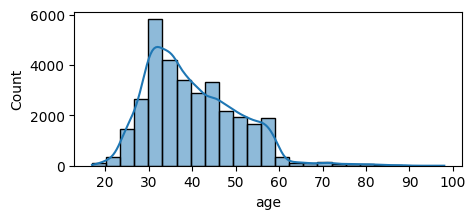

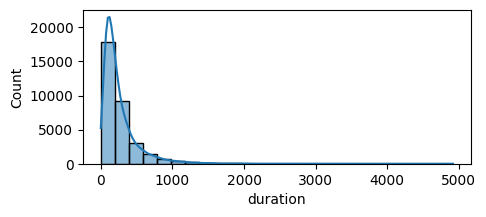

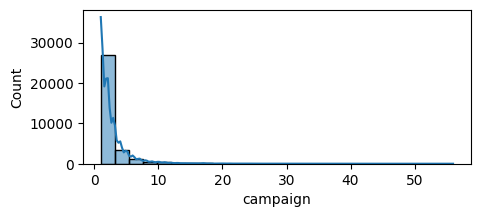

In [14]:
num_obj = df.select_dtypes(include = np.number).columns

for column in num_obj:
    plt.figure(figsize=(5, 2))
    sns.histplot(df[column], kde=True, bins=25)

Hier ist meine Vorgehensweise im Detail:

-	Ich berechne die Quantile, insbesondere das erste (Q1) und das dritte (Q3) Quartil.
-	Interquartilsabstand (IQR) bestimmen:
-	Der IQR wird als Differenz zwischen Q3 und Q1 berechnet.
-	Grenzwerte für Ausreißer festlegen:
-	Unter Verwendung des IQR definiere ich untere und obere Grenzwerte.
-	Datenpunkte unterhalb von Q1 - 1,5 * IQR oder über Q3 + 1,5 * IQR werden als potenzielle Ausreißer betrachtet.

In [15]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df[(df['age']>lower_limit)&(df['age']<upper_limit)]

Zunächst versuchte ich, alles in einer Funktion zu implementieren, stellte jedoch fest, dass mein DataFrame plötzlich keine Werte mehr enthielt. Daher führte ich die Schritte einzeln durch und packte sie anschließend in eine Funktion, was erfolgreich funktionierte.

In [16]:
for column in num_obj:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[column]>lower_limit)&(df_clean[column]<upper_limit)]

In [17]:
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,nonexistent,no


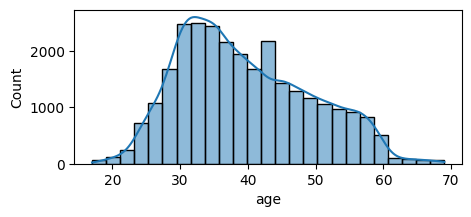

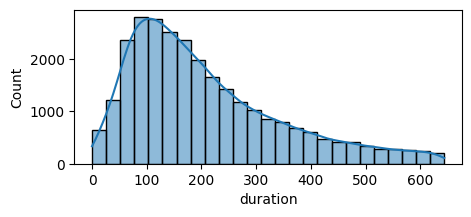

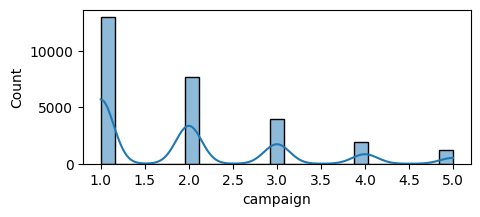

In [18]:
num_obj = df_clean.select_dtypes(include = np.number).columns

for column in num_obj:
    plt.figure(figsize=(5, 2))
    sns.histplot(df_clean[column], kde=True, bins=25)

Diese sorgfältige Bereinigung hat dazu beigetragen, Unreinheiten und störende Elemente zu eliminieren, wodurch die Grundlage für zuverlässige Analysen geschaffen wurde. 

Im nächsten Schritt wende ich Label-Encoding an, um jeder einzigartigen Kategorie einen numerischen Wert zuzuweisen. Dies erleichtert die Interpretation der Daten für bestimmte Modelle erheblich. Die Entscheidung für Label-Encoding fiel, da ich in den kategorischen Werten keine inhärente Ordnung feststellen konnte. 

In [19]:
import sklearn.preprocessing as skp
oe = skp.OrdinalEncoder()
ohe = skp.OneHotEncoder()
le = skp.LabelEncoder()

In [20]:
for column in cat_obj:
    df_clean[column] = le.fit_transform(df_clean[column])

Eine interessante Beobachtung ist dabei das Feature "default", das nahezu ausschließlich den Wert 0 aufweist, mit lediglich drei abweichenden Werten. Diese geringe Varianz deutet darauf hin, dass das Feature wenig Aussagekraft besitzt und somit für meine Vorhersagezwecke wenig relevant ist.

In [21]:
df['default'].value_counts()

default
no     32939
yes        3
Name: count, dtype: int64

In [22]:
df_clean = df_clean.drop(['default'], axis=1)

In der folgenden Analyse betrachte ich die Korrelation zwischen den einzelnen Merkmalen. 

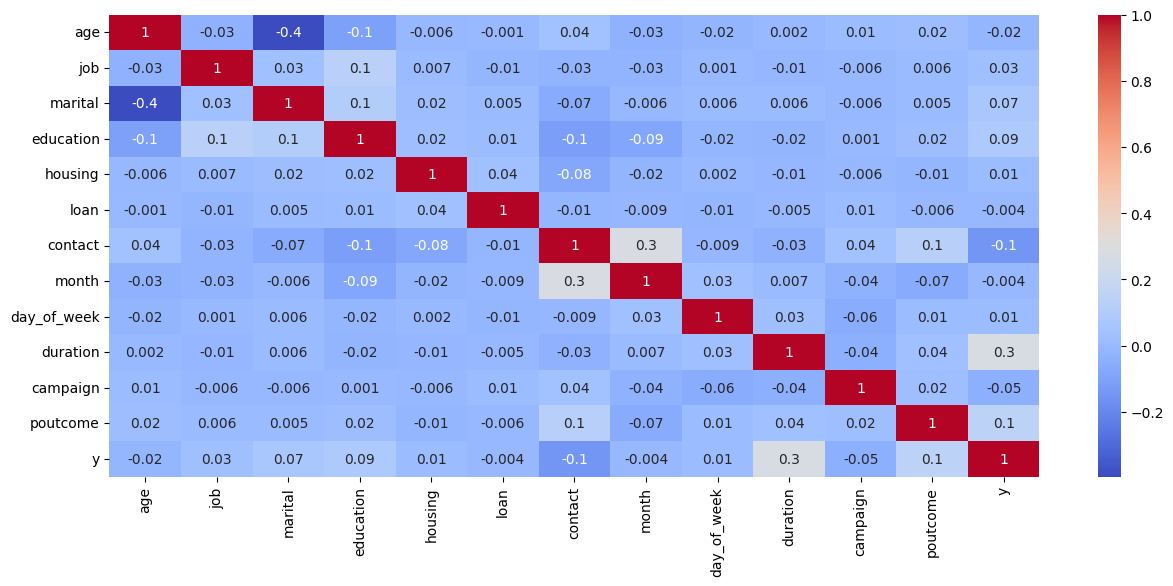

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_clean.corr().round(3), annot=True, fmt=".1g", cmap="coolwarm")
plt.show()

 Es fällt auf, dass sämtliche Features nicht miteinander korrelieren. Auffällig sind jedoch "marital" und "age" mit einer Korrelation von etwa "-0,4" und "contact" und "month“ die eine positive Korrelation von etwa "0,3" aufweisen. Das sollte uns aber nicht daran hindern akkurate Ergebnisse zu produzieren. Diese Erkenntnisse sind von Bedeutung, da sie darauf hinweisen, dass die meisten Merkmale in meinen Daten wenig miteinander korrelieren, mit Ausnahme der bereits genannten Ausnahmen. Die festgestellte geringe Korrelation zwischen den Features deutet darauf hin, dass sie relativ unabhängig voneinander sind, was für unsere Analyse von Vorteil ist, da redundante Informationen vermieden werden können.

Das sind die drei Betracht kommenden Modelle für meinen Anwendungsfall: 

1. Logistische Regression:
Die logistische Regression ist eine zuverlässige Methode für Probleme, bei denen es darum geht, zwischen zwei Kategorien zu unterscheiden. Besonders geeignet ist sie, wenn die Zusammenhänge zwischen den Eigenschaften (Features) und der Zielvariable nicht übermäßig komplex sind. Diese Methode nutzt die logistische Loss-Funktion und zur Bewertung dienen Metriken wie Genauigkeit (Accuracy), Präzision, Recall und F1-Score.

3. Entscheidungsbaum-Klassifikator:
Entscheidungsbäume sind nützlich, wenn es darum geht, klare Entscheidungsregeln aus den Daten zu gewinnen. Es minimiert typischerweise den Gini-Index oder die Entropie, um die besten Trennungen in den Daten zu finden. Auch hier sind Genauigkeit, Präzision, Recall und F1-Score wichtige Maßstäbe zur Beurteilung des Modells.

5. Random Forest:
Der Random Forest ist eine fortschrittliche Methode, die mehrere Entscheidungsbäume kombiniert, um genauere Vorhersagen zu treffen und Überanpassung zu vermeiden. Jeder Entscheidungsbaum im Random Forest verwendet ebenfalls den Gini-Index oder die Entropie. Genauigkeit, Präzision, Recall und F1-Score sind auch hier zentrale Maßstäbe zur Bewertung der Modelle.

In [24]:
df_clean["y"].value_counts()
print(df_clean["y"].value_counts(), 'Anteil an Ja oder Nein bei', df_clean['y'].value_counts()/len(df_clean)*100)

y
0    25450
1     2287
Name: count, dtype: int64 Anteil an Ja oder Nein bei y
0    91.754696
1     8.245304
Name: count, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop('y', axis=1), df_clean['y'],
    test_size=0.25, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8976207642393655


Hier habe ich einen Entscheidungsbaum-Klassifikator mit dem Namen "clf" erstellt.
Dieser Klassifikator wurde auf den Trainingsdaten (X_train, y_train) trainiert. 
Während des Trainings lernt der Entscheidungsbaumalgorithmus aus den vorliegenden Daten, um später Vorhersagen treffen zu können.
Mit dem trainierten Entscheidungsbaum habe ich Vorhersagen (y_pred) für den Testdatensatz (X_test) gemacht.
Durch die Anwendung von "accuracy_score(y_pred, y_test)" habe ich die Genauigkeit des Modells auf dem Testdatensatz berechnet und ausgegeben.

Text(50.722222222222214, 0.5, 'actual')

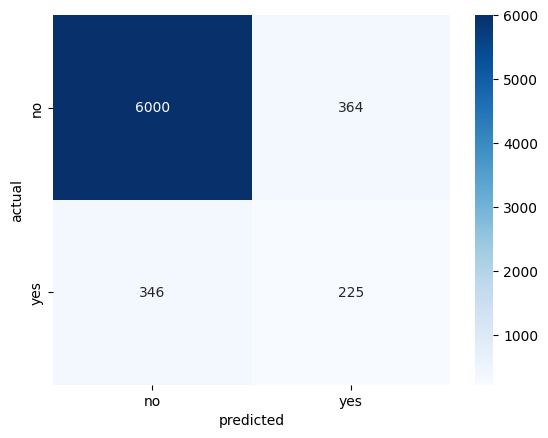

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')

Der erzielte Accuracy-Score von etwa 90% scheint auf den ersten Blick beeindruckend zu sein. Allerdings wird durch die Analyse der Konfusionsmatrix deutlich, dass dieser Score möglicherweise irreführend ist, insbesondere, bevor die Verhältnisse angepasst wurden. Das Modell zeigt gute Leistung, jedoch gibt es mehr „false positive“ und „false negative“ Ergebnisse im Vergleich zu den „true positives“. Dies deutet darauf hin, dass es aufgrund des ungleichen Verhältnisses von positiven Beispielen zu negativen Beispielen dazu neigt falsch zu klassifizieren.

In [28]:
x = df_clean.drop('y', axis=1) 
y = df_clean['y']

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.7, random_state=42)
X_res, y_res = sm.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.25, random_state=42)

Um dieses Problem entgegenzutreten, könnte ich ein Downsampling-Verfahren anwenden. Hierbei würden ich einen Teil der Datensätze der negativen Klasse entfernen, um das Klassenverhältnis auszugleichen. Dieser Ansatz könnte dazu beitragen, dass das Modell besser auf die positive Klasse abgestimmt ist und nicht durch die Überrepräsentation der negativen Klasse beeinflusst wird. 
Das würde aber bedeuten, dass wir mehr als die Hälfte unserer Daten verlieren würden. Das wiederum könnte unser Ergbenis verschlechtern. Einer der besseren Methoden nennt sich SMOTE. Das steht für Synthetic Minority Oversampling Technique und es ist eine Methode des Oversamplings. Dabei wird die kleine Klasse künstlich vergrößert. 


0.7928261070537117


Text(50.722222222222214, 0.5, 'actual')

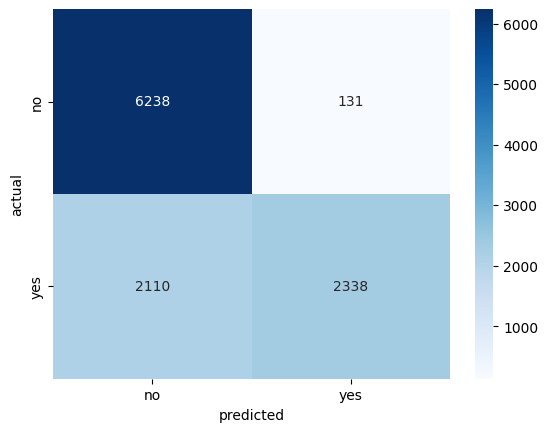

In [29]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')

Nehmen wir das gleiche Beispiel: Dieses Mal weist das Modell einen Accuracy-Score von 80% auf. Bei genauerer Betrachtung der Konfusionsmatrix wird deutlich, welchen Unterschied dies ausmacht. Das Modell hat nun häufiger bei der Vorhersage der Personen, die kein Abonnement abgeschlossen haben.

In [30]:
y_train.value_counts()

y
0    19081
1    13367
Name: count, dtype: int64

SMOTE hat tatsächlich funktioniert und hat unser Ergebnis erheblich verändert.

In [31]:
from sklearn.ensemble import RandomForestClassifier

Ich habe ein Random Forest Classifier-Modell mit dem Namen "rfc" erstellt und dabei "random_state=42" verwendet, um sicherzustellen, dass die Zufälligkeitskomponente des Modells reproduzierbar ist. Anschließend habe ich das Modell auf den Trainingsdaten (X_train, y_train) trainiert.

Ich habe Vorhersagen (y_pred) für die Testdaten (X_test) gemacht, um die Leistung des Modells auf bisher ungesehenen Daten zu bewerten Der Accuracy_Score hat sich verbessert..


0.9212350929093094


Text(50.722222222222214, 0.5, 'actual')

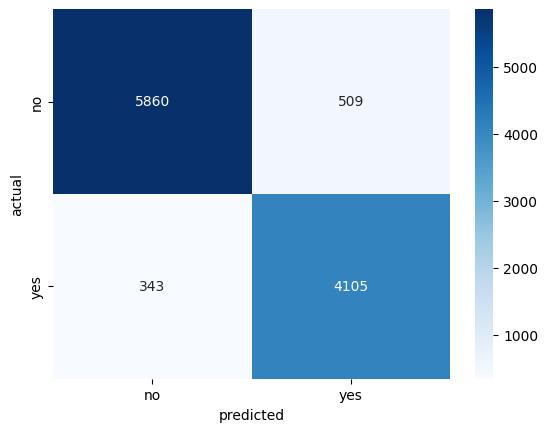

In [32]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')

Nachdem ich eine Confusion Matrix erstellt habe, habe ich diese mithilfe von "sns.heatmap" grafisch dargestellt. Die Achsen repräsentieren die vorhergesagten und tatsächlichen Klassen, während die Farben die Anzahl der Vorhersagen anzeigen. Diese visuelle Darstellung bietet einen Einblick in die Leistung des Modells. Das sieht im Vergleich zum Decision Tree Classifier sehr vielversprechend aus.

In [33]:
from sklearn.model_selection import cross_val_score
import optuna

Die Auswahl der Hyperparameter spielt eine entscheidende Rolle in der Gestaltung des Random Forest Modells. 
Der eigentliche Prozess beginnt mit der Erstellung eines Random Forest Classifiers unter Verwendung der vorgeschlagenen Hyperparameter. Dieser Schritt ist essenziell, da er die Grundlage für die nachfolgende Optimierung bildet. 

In [34]:
def objective(trial):
    param_max_depth = trial.suggest_int('max_depth', 1, 20)
    param_max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 128)
    param_min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    param_criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    param_n_estimators = trial.suggest_int('n_estimators', 10, 500)

    # train and evaluate model with suggested hyperparameter
    model = RandomForestClassifier(max_depth = param_max_depth, 
                                             max_leaf_nodes= param_max_leaf_nodes, 
                                             min_samples_split= param_min_samples_split,
                                             n_estimators = param_n_estimators,
                                             criterion=param_criterion, random_state=42)
    model.fit(X_train, y_train)
    
    score = cross_val_score(model, X_train, y_train, cv=5)
    accuracy= score.mean()
    return accuracy

Ich schlage verschiedene Werte für max_depth, max_leaf_nodes und min_samples_split vor. Diese Hyperparameter beeinflussen maßgeblich die Struktur und Tiefe der einzelnen Entscheidungsbäume im Random Forest. Gleichzeitig teste ich unterschiedliche Kriterien, nämlich 'gini' und 'entropy', für die Qualitätsmetrik, die die Aufteilung der Bäume bestimmt. Zudem variiere ich die Anzahl der Bäume im Wald (n_estimators) von 10 bis 500.

Das Modell wird auf den Trainingsdaten (X_train, y_train) trainiert. Anschließend erfolgt die Bewertung der Modellleistung mithilfe einer 5-fachen Kreuzvalidierung mittels cross_val_score. Diese Methode liefert eine zuverlässige Schätzung der Genauigkeit, indem sie das Modell auf verschiedenen Teilmengen der Daten testet. Anschlißend gibt Funktion die durchschnittliche Genauigkeit des Modells über die verschiedenen Kreuzvalidierungsiterationen zurück.

Diese Metrik dient als Bewertungsmaßstab für die Leistungsfähigkeit des Modells unter den getesteten Hyperparameter-Kombinationen. Das Optimierungsverfahren, das diese Funktion nutzt, wird darauf abzielen, jene Hyperparameter-Werte zu identifizieren, die die Genauigkeit maximieren.
Zusammenfassend arbeite ich darauf hin, automatisch die optimalen Einstellungen für die Hyperparameter des Random Forest Modells zu finden, um die Vorhersagegenauigkeit bestmöglich zu steigern.

Im folgenden erstelle ich einen Raum, wo die ganzen Optimisationversuche und deren Hyperparameter gespeichert werden.

In [35]:
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())  # Create a new study.

[I 2024-01-29 23:40:37,920] A new study created in memory with name: no-name-971e747a-c371-4f6c-8343-c94b5ace348e


Aus irgendeinem Grund, konnte ich es nicht hinkriegen, dass der Pruningstep funktioniert. Es hat einfach weitergerechnet, obwohl das Ergebnis im Endeffekt doch schlechter war.

In diesem Schritt führe ich dann den Optimierungsvorgang von Optuna aus. Ich konnte jedoch das ursprünglich Ergebnisse vom Random Forrest Classifier nicht erreichen, geschweige denn das verbessern.

In [ ]:
study.optimize(objective, n_trials=29)

[I 2024-01-29 23:40:47,528] Trial 0 finished with value: 0.8170916432953621 and parameters: {'max_depth': 20, 'max_leaf_nodes': 16, 'min_samples_split': 36, 'criterion': 'entropy', 'n_estimators': 196}. Best is trial 0 with value: 0.8170916432953621.
[I 2024-01-29 23:41:01,887] Trial 1 finished with value: 0.8030692928010683 and parameters: {'max_depth': 9, 'max_leaf_nodes': 9, 'min_samples_split': 20, 'criterion': 'entropy', 'n_estimators': 341}. Best is trial 0 with value: 0.8170916432953621.
[I 2024-01-29 23:41:30,433] Trial 2 finished with value: 0.8537966229919496 and parameters: {'max_depth': 15, 'max_leaf_nodes': 82, 'min_samples_split': 22, 'criterion': 'entropy', 'n_estimators': 397}. Best is trial 2 with value: 0.8537966229919496.
[I 2024-01-29 23:42:04,999] Trial 3 finished with value: 0.8507148116725212 and parameters: {'max_depth': 11, 'max_leaf_nodes': 89, 'min_samples_split': 17, 'criterion': 'entropy', 'n_estimators': 485}. Best is trial 2 with value: 0.8537966229919496

Hiermit beende ich die Bearbeitung von diesem Projekt.